# Baseline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
# df = pd.read_csv('df_with_target_and_features.csv', sep='\t')
# df.shape

In [3]:
# pip install polars

In [4]:
import polars as pl

df = pl.read_csv('df_with_target_and_features.csv', separator='\t')
df.shape  # Devuelve (filas, columnas)

(7781619, 354)

In [5]:
df.head()

period,product_id,customer_id,tn,target,periodo,year,month,days_in_month,semester,quarter,month_q,period_ordinal,month_sin,month_cos,quarter_sin,quarter_cos,period_ordinal_sin,period_ordinal_cos,is_summer,is_winter,pre_march,pre_october,cat1_FOODS,cat1_HC,cat1_PC,cat1_REF,tn_lag1,tn_lag2,tn_lag3,tn_lag4,tn_lag5,tn_lag6,tn_lag7,tn_lag8,tn_lag9,tn_lag10,…,tn_rel_delta5,tn_delta6,tn_rel_delta6,tn_delta7,tn_rel_delta7,tn_delta8,tn_rel_delta8,tn_delta9,tn_rel_delta9,tn_delta10,tn_rel_delta10,tn_delta11,tn_rel_delta11,tn_delta12,tn_rel_delta12,tn_accel1,tn_accel2,tn_accel3,tn_accel4,tn_accel5,tn_accel6,tn_accel7,tn_accel8,tn_accel9,tn_accel10,tn_accel11,tn_trend_slope2,tn_trend_slope3,tn_trend_slope6,tn_trend_slope9,tn_trend_slope12,tn_trend_slope18,tn_trend_slope24,tn_trend_slope36,tn_vs_ma12,no_sale,no_sale_streak
str,i64,i64,f64,f64,str,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64
"""2017-01""",20001,10001,99.43861,92.46537,"""2017-01""",2017,1,31,1,1,1,1,0.5,0.866025,1.0,6.1232e-17,0.173648,0.984808,1,0,0,0,0.0,1.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0.0,0,0
"""2017-02""",20001,10001,198.84365,13.29728,"""2017-02""",2017,2,28,1,1,2,2,0.866025,0.5,1.0,6.1232e-17,0.34202,0.939693,1,0,1,0,0.0,1.0,0.0,0.0,99.43861,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,99.40504,null,null,null,null,null,null,null,49.70252,0,0
"""2017-03""",20001,10001,92.46537,101.00563,"""2017-03""",2017,3,31,1,1,3,3,1.0,6.1232e-17,1.0,6.1232e-17,0.5,0.866025,0,0,0,0,0.0,1.0,0.0,0.0,198.84365,99.43861,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,-99.40504,null,null,null,null,null,null,null,null,null,null,-106.37828,-3.48662,null,null,null,null,null,null,-37.78384,0,0
"""2017-04""",20001,10001,13.29728,128.04792,"""2017-04""",2017,4,30,1,2,1,4,0.866025,-0.5,1.2246e-16,-1.0,0.642788,0.766044,0,0,0,0,0.0,1.0,0.0,0.0,92.46537,198.84365,99.43861,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,106.37828,-99.40504,null,null,null,null,null,null,null,null,null,-79.16809,-92.773185,null,null,null,null,null,null,-87.713947,0,0
"""2017-05""",20001,10001,101.00563,101.20711,"""2017-05""",2017,5,31,1,2,2,5,0.5,-0.866025,1.2246e-16,-1.0,0.766044,0.642788,0,0,0,0,0.0,1.0,0.0,0.0,13.29728,92.46537,198.84365,99.43861,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,79.16809,106.37828,-99.40504,null,null,null,null,null,null,null,null,87.70835,4.27013,null,null,null,null,null,null,-0.004478,0,0


In [6]:
# df['target_ratio'] = df['tn'] / (df['target'] + 1e-6)  # clase = tn+2
df = df.with_columns(
    (pl.col('tn') / (pl.col('target') + 1e-6)).alias('target_ratio')
)

In [7]:
# df['period'] = pd.to_datetime(df['period'], format='%Y-%m').dt.to_period('M')
df = df.with_columns(
    pl.col('period').str.strptime(pl.Date, format='%Y-%m').alias('period_dt')
)

### Split temporal

In [8]:
# # Excluir columnas no numéricas y no predictoras: 'period', 'product_id', 'customer_id', 'periodo'
# exclude_cols = ['period', 'customer_id', 'periodo', 'target','share_cliente']# 'product_id', #,'share_producto']#,'tn_pct_change1', 'tn_pct_change6', 'tn_pct_change9']
# features = [col for col in df.columns if col not in exclude_cols and df[col].dtype in [np.float64, np.int64]]

exclude_cols = ['period', 'customer_id', 'periodo', 'target', 'target_ratio', 'share_cliente']  # tu lista

# Seleccionamos columnas numéricas no excluidas
features = [
    col
    for col, dtype in zip(df.columns, df.dtypes)
    if (col not in exclude_cols) and (dtype in [pl.Float64, pl.Int64])
]

In [9]:
# # Train son periodos 1 a 30, test son 31 a 36
# df_train = df['period_ordinal'] <= 30
# df_test = df['period_ordinal'] > 30

# X_train = df[df_train[features]]
# y_train = df[df_train]['target_column']

# X_test = df[df_test[features]]
# y_test = df[df_test]['target_column']

# Train: period_ordinal <= 30
df_train = df.filter(pl.col('period_ordinal') <= 30)
X_train = df_train.select(features)
y_train = df_train['target_ratio']

# Test: period_ordinal > 30
df_test = df.filter(pl.col('period_ordinal') > 30)
X_test = df_test.select(features)
y_test = df_test['target_ratio']

: 

# Baseline Model

In [ ]:
# import lightgbm as lgb
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # 1. Entrenamiento con hiperparámetros default (o simples)
# params = {
#     "objective": "regression",
#     "metric": "mae",
#     "verbosity": -1,
#     "boosting_type": "gbdt",
#     "random_state": 42
# }

# dtrain = lgb.Dataset(X_train, label=y_train)
# dvalid = lgb.Dataset(X_test, label=y_test)

# # Entrenar modelo baseline
# model = lgb.train(
#     params,
#     dtrain,
#     num_boost_round=1000,
#     valid_sets=[dtrain, dvalid],
#     early_stopping_rounds=30,
#     verbose_eval=50
# )

# # 2. Predicciones y métricas
# train_pred = model.predict(X_train)
# test_pred = model.predict(X_test)

# mae_train = mean_absolute_error(y_train, train_pred)
# mae_test = mean_absolute_error(y_test, test_pred)
# rmse_train = mean_squared_error(y_train, train_pred, squared=False)
# rmse_test = mean_squared_error(y_test, test_pred, squared=False)

# print(f"Train MAE: {mae_train:.3f} | RMSE: {rmse_train:.3f}")
# print(f"Test  MAE: {mae_test:.3f} | RMSE: {rmse_test:.3f}")

# # Supongamos que ya entrenaste el modelo y tenés X_test, df_test

# ratio_test_pred = model.predict(X_test)

# ratio_train_pred = model.predict(X_train)

# tn_pred_test = X_test['tn'] / (ratio_test_pred + 1e-6)   # <--- Inversión
# df_test['tn_pred'] = tn_pred_test

# tn_pred_train = X_train['tn'] / (ratio_train_pred + 1e-6)   # <--- Inversión
# df_train['tn_pred'] = tn_pred_train

# # Métrica en términos reales
# y_test_real = df_test['clase']  # tn+2 real
# y_train_real = df_train['clase']  # tn+2 real

# mae = mean_absolute_error(y_test_real, tn_pred_test)
# rmse = mean_squared_error(y_test_real, tn_pred_test, squared=False)

# print(f"Test MAE (tn+2): {mae:.3f} | RMSE (tn+2): {rmse:.3f}")

In [10]:
# Convertir a numpy/pandas
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Entrenamiento con hiperparámetros default (o simples)
params = {
    "objective": "regression",
    "metric": "mae",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "random_state": 42
}

dtrain = lgb.Dataset(X_train_np, label=y_train_np)
dvalid = lgb.Dataset(X_test_np, label=y_test_np)

# Entrenar modelo baseline
model = lgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    valid_sets=[dtrain, dvalid],
    early_stopping_rounds=30,
    verbose_eval=50
)

In [10]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Entrenamiento con hiperparámetros default (o simples)
params = {
    "objective": "regression",
    "metric": "mae",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "random_state": 42
}

dtrain = lgb.Dataset(X_train_np, label=y_train_np)
dvalid = lgb.Dataset(X_test_np, label=y_test_np)

# Entrenar modelo baseline
model = lgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    valid_sets=[dtrain, dvalid],
    early_stopping_rounds=30,
    verbose_eval=50
)

# 2. Predicciones y métricas (ratios)
train_pred = model.predict(X_train_np)
test_pred = model.predict(X_test_np)

mae_train = mean_absolute_error(y_train_np, train_pred)
mae_test = mean_absolute_error(y_test_np, test_pred)
rmse_train = mean_squared_error(y_train_np, train_pred, squared=False)
rmse_test = mean_squared_error(y_test_np, test_pred, squared=False)

print(f"Train MAE: {mae_train:.3f} | RMSE: {rmse_train:.3f}")
print(f"Test  MAE: {mae_test:.3f} | RMSE: {rmse_test:.3f}")

# 3. Inversión para obtener tn+2 predicho
tn_pred_test = X_test['tn'].to_numpy() / (test_pred + 1e-6)   # <--- Inversión
tn_pred_train = X_train['tn'].to_numpy() / (train_pred + 1e-6)

# Opcional: agregarlos como columna en tu Polars DataFrame
df_test = df_test.with_columns(pl.Series('tn_pred', tn_pred_test))
df_train = df_train.with_columns(pl.Series('tn_pred', tn_pred_train))

# 4. Métrica en términos reales
y_test_real = df_test['clase'].to_numpy()  # tn+2 real
y_train_real = df_train['clase'].to_numpy()  # tn+2 real

mae_real = mean_absolute_error(y_test_real, tn_pred_test)
rmse_real = mean_squared_error(y_test_real, tn_pred_test, squared=False)

print(f"Test MAE (tn+2): {mae_real:.3f} | RMSE (tn+2): {rmse_real:.3f}")

: 

In [ ]:
import matplotlib.pyplot as plt

# Si es periodo tipo Period, lo convertís a string para el eje X
df_test['periodo_str'] = df_test['periodo'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(df_test['periodo_str'], df_test['tn_real'], marker='o', label='TN Real')
plt.plot(df_test['periodo_str'], df_test['tn_pred'], marker='s', label='TN Predicho')
plt.title('Comparación TN Real vs. TN Predicho')
plt.xlabel('Periodo')
plt.ylabel('Toneladas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [16]:
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgb.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 features más importantes:")
print(feature_importances.head(10).to_string(index=False))


Top 10 features más importantes:
       feature  importance
tn_pct_change6         417
tn_pct_change1         406
tn_pct_change9         344
share_producto         328
  tn_div_roll9         317
  tn_div_roll3         270
  tn_div_roll6         258
            tn         228
         month         201
      prod_age         183


In [17]:
# 8) Reconstruir un DataFrame de validación con periodo, real y predicho
#    Como X_valid lleva el mismo índice que df_train, podemos hacer:
df_valid = df_train.loc[X_valid.index, ['period', 'product_id', 'customer_id', 'tn']]
df_valid = df_valid.copy()  # para evitar SettingWithCopyWarning

#      • 'tn' en df_train era, por ejemplo, tn_actual para ese mes. 
#        Si en tu esquema el valor real que quieres graficar es distinto, usa la columna correcta.
df_valid['tn_pred'] = y_pred
df_valid['tn_actual'] = df_valid['tn']  # renombramos para tener claridad
df_valid.drop(columns=['tn'], inplace=True)

In [134]:
# 9) Agrupar por mes (Period) y sumar tn_actual y tn_pred
df_monthly = (
    df_valid
    .groupby('period')
    .agg(
        actual = ('tn_actual', 'sum'),
        pred   = ('tn_pred',   'sum')
    )
    .reset_index()
)

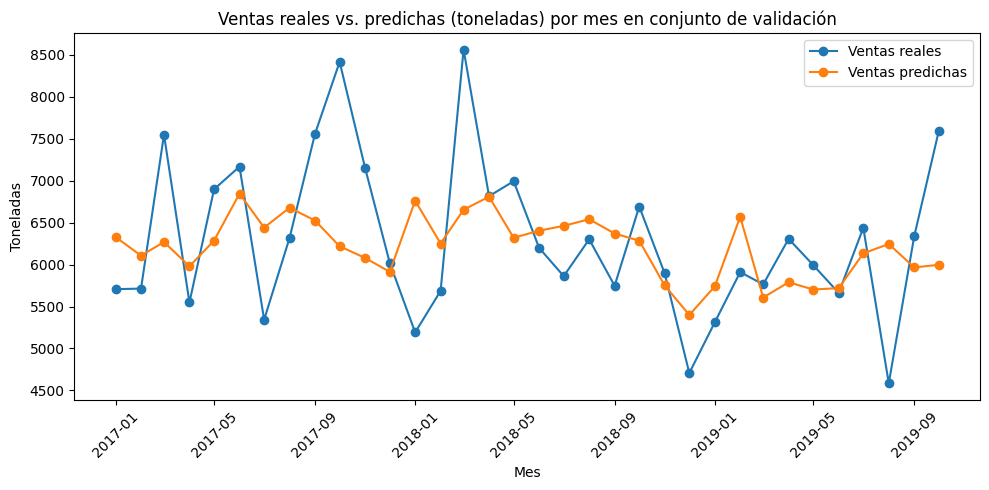

In [126]:
# 10) Convertir Period a datetime para graficar en el eje X
df_monthly['fecha'] = df_monthly['period'].dt.to_timestamp()

# 11) Graficar ventas reales vs. predichas
plt.figure(figsize=(10,5))
plt.plot(df_monthly['fecha'], df_monthly['actual'],  marker='o', label='Ventas reales')
plt.plot(df_monthly['fecha'], df_monthly['pred'],    marker='o', label='Ventas predichas')
plt.title('Ventas reales vs. predichas (toneladas) por mes en conjunto de validación')
plt.xlabel('Mes')
plt.ylabel('Toneladas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [108]:
# 1) Filtrar solo las filas de diciembre 2019 (periodo justo dos meses antes de 2020-02).
df_test = df[df['period'] == pd.Period('2019-12', freq='M')].copy()

# 2) Asegurarnos de que df_test tenga exactamente las mismas features que el modelo espera
#    (es decir, la lista “features” que usaste para entrenar).
X_test = df_test[features]

# 3) Llamar a model.predict() para obtener la predicción de tn en 2020-02
#    Usamos best_iteration_ si implementaste early_stopping
y_pred_202002 = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration_)

# 4) Construir el DataFrame de salida con “periodo=2020-02”
df_pred_final = pd.DataFrame({
    'periodo': '2020-02',                      # todos iguales
    'product_id': df_test['product_id'].values,
    'customer_id': df_test['customer_id'].values,
    'tn_actual': df_test['tn'].values,         # valores reales de tn en diciembre 2019
    'prediccion_toneladas': y_pred_202002                    # predicciones
})

In [41]:
df_pred_final.head()

,periodo,product_id,customer_id,tn_actual,prediccion_toneladas
0,2020-02,20001,10001,180.21938,186.524143
1,2020-02,20001,10002,113.33165,35.724231
2,2020-02,20001,10003,102.27517,128.222175
3,2020-02,20001,10004,34.64810,100.691101
4,2020-02,20001,10005,19.60368,10.024324


In [42]:
df_entrega = (
    df_pred_final
    .groupby('product_id', as_index=False)['prediccion_toneladas']
    .sum()
)

df_entrega.to_csv('df_baseline_pred_01.csv', index=False)

print("CSV generado y listo para descargar")
print(f"Forma final: {df_entrega.shape}")

CSV generado y listo para descargar
Forma final: (780, 2)


In [38]:
df_entrega.head()

,product_id,prediccion_toneladas
0,20001,1343.571845
1,20002,1068.312510
2,20003,714.957239
3,20004,575.261352
4,20005,643.540752


In [18]:
# 1) Filtrar solo las filas de diciembre 2019 (periodo justo dos meses antes de 2020-02).
df_check = df[df['period'] == pd.Period('2019-10', freq='M')].copy()

# 2) Asegurarnos de que df_test tenga exactamente las mismas features que el modelo espera
#    (es decir, la lista “features” que usaste para entrenar).
X_check = df_check[features]

# 3) Llamar a model.predict() para obtener la predicción de tn en 2020-02
#    Usamos best_iteration_ si implementaste early_stopping
y_pred_201910 = lgb_model.predict(X_check, num_iteration=lgb_model.best_iteration_)

# 4) Construir el DataFrame de salida con “periodo=2020-02”
df_pred_final = pd.DataFrame({
    'periodo': '2019-10',                      # todos iguales
    'product_id': df_check['product_id'].values,
    'customer_id': df_check['customer_id'].values,
    'tn_real': df_check['tn'].values,         # valores reales de tn en diciembre 2019
    'tn_predicho': y_pred_201910                    # predicciones
})

In [19]:
df_pred_final

,periodo,product_id,customer_id,tn_real,tn_predicho
0,2019-10,20001,10001,176.02980,165.651189
1,2019-10,20001,10002,17.40806,32.716081
2,2019-10,20001,10003,76.00625,95.198704
3,2019-10,20001,10004,324.96172,93.820516
4,2019-10,20001,10005,17.13921,9.799456
...,...,...,...,...,...
262611,2019-10,21276,10428,0.00000,0.010705
262612,2019-10,21276,10456,0.00000,0.010705
262613,2019-10,21276,10462,0.00075,0.010705
262614,2019-10,21276,10495,0.00000,0.010705


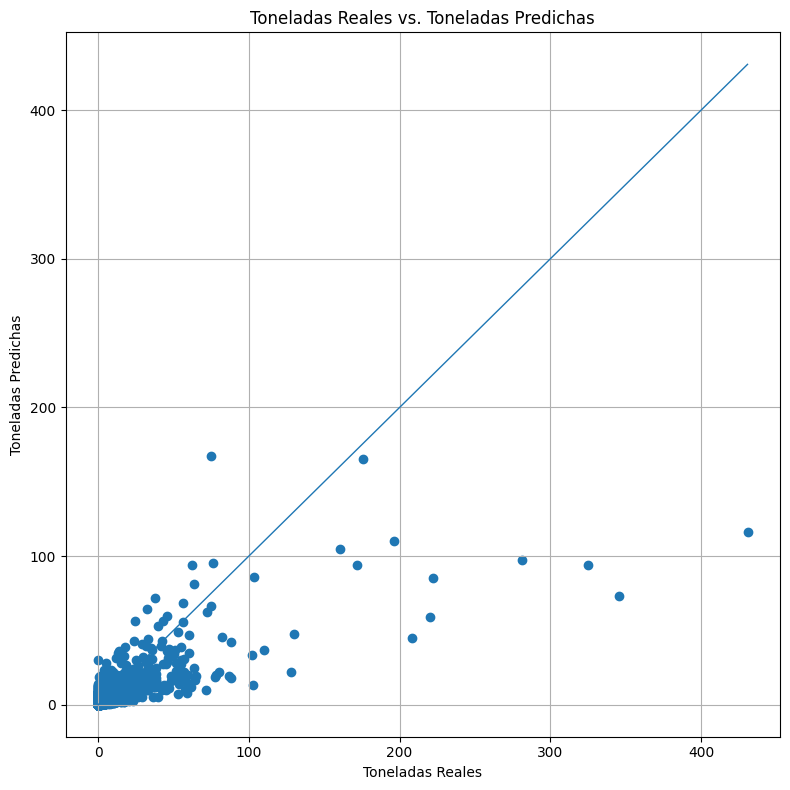

In [20]:
import matplotlib.pyplot as plt

# Asume que tu DataFrame se llama `df` y tiene las columnas 'tn_real' y 'tn_predicho'

plt.figure(figsize=(8, 8))

# 1. Dibuja los puntos
plt.scatter(
    df_pred_final['tn_real'],
    df_pred_final['tn_predicho'],
    marker='o'
)

# 2. Traza la línea y = x para separación perfecta
min_val = min(df_pred_final['tn_real'].min(), df_pred_final['tn_predicho'].min())
max_val = max(df_pred_final['tn_real'].max(), df_pred_final['tn_predicho'].max())
plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    linestyle='-',    # línea continua
    linewidth=1       # grosor de línea
)

# 3. Etiquetas y ajustes
plt.title('Toneladas Reales vs. Toneladas Predichas')
plt.xlabel('Toneladas Reales')
plt.ylabel('Toneladas Predichas')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
transformar la clase a predecir:
- un ratio cociente el valor anterior y el valor actual 
- delta con el anterior --> mas ruido
- 

moving average

metodo directo

mismo set para o
dtw

flag en julio y agosto

la media movil debe ser del mes que estoy mirando para atras
